In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io as sio

arr=sio.loadmat('/content/drive/MyDrive/AffectiveAI/Deap/s01.mat')

In [3]:
print(arr['__header__'])

b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Jan 19 10:27:04 2011'


In [4]:
print(arr['labels'])
print(arr['labels'].shape)
print(arr['labels'][:,0])

[[7.71 7.6  6.9  7.83]
 [8.1  7.31 7.28 8.47]
 [8.58 7.54 9.   7.08]
 [4.94 6.01 6.12 8.06]
 [6.96 3.92 7.19 6.05]
 [8.27 3.92 7.   8.03]
 [7.44 3.73 7.08 7.04]
 [7.32 2.55 6.32 5.87]
 [4.04 3.29 3.62 5.99]
 [1.99 4.86 2.04 7.09]
 [2.99 2.36 3.63 6.24]
 [2.71 2.77 3.4  7.35]
 [1.95 3.12 2.87 6.18]
 [4.18 2.24 3.04 5.04]
 [3.17 8.08 2.91 5.04]
 [6.81 7.44 8.15 7.14]
 [2.46 6.91 6.77 6.41]
 [7.23 7.15 6.94 8.01]
 [7.17 8.   8.1  6.79]
 [8.26 7.91 7.19 8.13]
 [9.   7.95 8.37 7.86]
 [7.09 2.08 7.06 7.37]
 [8.15 3.01 7.37 7.9 ]
 [7.04 7.09 8.01 8.22]
 [8.86 7.21 8.65 7.21]
 [7.28 7.27 7.41 8.24]
 [7.35 6.95 7.03 7.29]
 [3.88 3.35 4.01 7.87]
 [1.36 2.27 3.   8.14]
 [2.08 2.99 3.22 7.33]
 [3.03 8.14 2.86 8.04]
 [2.28 8.   3.27 3.95]
 [3.81 3.85 4.78 5.13]
 [2.28 7.09 7.28 6.92]
 [2.06 8.15 8.05 5.18]
 [2.9  6.92 6.5  3.87]
 [2.31 6.88 3.1  6.77]
 [3.33 7.18 6.54 6.62]
 [3.24 6.18 7.87 6.15]
 [5.1  7.12 6.17 5.97]]
(40, 4)
[7.71 8.1  8.58 4.94 6.96 8.27 7.44 7.32 4.04 1.99 2.99 2.71 1.95 4.18


In [5]:
print(arr['data'][0][0])
print(arr['data'].shape)
print(type(arr['data']))

[ 0.94823168  1.65333533  3.01372577 ... -2.82648937 -4.47722969
 -3.67692812]
(40, 40, 8064)
<class 'numpy.ndarray'>


In [6]:
#### pandas 활용

In [7]:
import pandas as pd
import numpy as np

# label to daraframe
label=pd.DataFrame.from_dict(arr['labels'])

# data to dataframe
data_bf=arr['data']
data_reshape=data_bf.reshape(1600, 8064)
data=pd.DataFrame(data_reshape)

case_list=[]
for i in range(1, arr['data'].shape[0]+1):
  case_list.extend([i]*(arr['data'].shape[0]))

data.insert(0, 'case', case_list)

print(label)
print(data[0])

       0     1     2     3
0   7.71  7.60  6.90  7.83
1   8.10  7.31  7.28  8.47
2   8.58  7.54  9.00  7.08
3   4.94  6.01  6.12  8.06
4   6.96  3.92  7.19  6.05
5   8.27  3.92  7.00  8.03
6   7.44  3.73  7.08  7.04
7   7.32  2.55  6.32  5.87
8   4.04  3.29  3.62  5.99
9   1.99  4.86  2.04  7.09
10  2.99  2.36  3.63  6.24
11  2.71  2.77  3.40  7.35
12  1.95  3.12  2.87  6.18
13  4.18  2.24  3.04  5.04
14  3.17  8.08  2.91  5.04
15  6.81  7.44  8.15  7.14
16  2.46  6.91  6.77  6.41
17  7.23  7.15  6.94  8.01
18  7.17  8.00  8.10  6.79
19  8.26  7.91  7.19  8.13
20  9.00  7.95  8.37  7.86
21  7.09  2.08  7.06  7.37
22  8.15  3.01  7.37  7.90
23  7.04  7.09  8.01  8.22
24  8.86  7.21  8.65  7.21
25  7.28  7.27  7.41  8.24
26  7.35  6.95  7.03  7.29
27  3.88  3.35  4.01  7.87
28  1.36  2.27  3.00  8.14
29  2.08  2.99  3.22  7.33
30  3.03  8.14  2.86  8.04
31  2.28  8.00  3.27  3.95
32  3.81  3.85  4.78  5.13
33  2.28  7.09  7.28  6.92
34  2.06  8.15  8.05  5.18
35  2.90  6.92  6.50  3.87
3

In [8]:
### numpy로

In [9]:
labels=arr['labels']

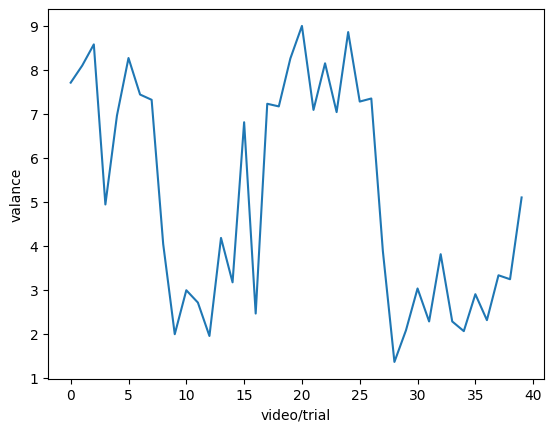

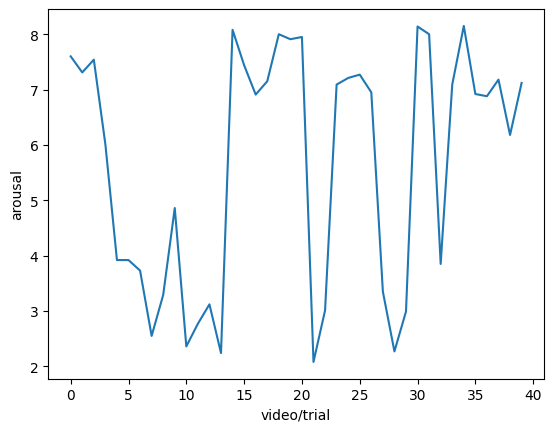

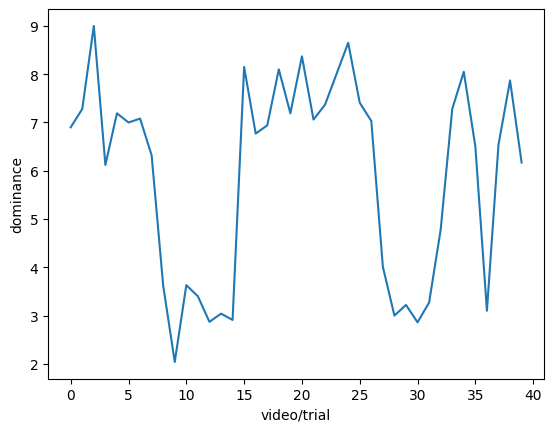

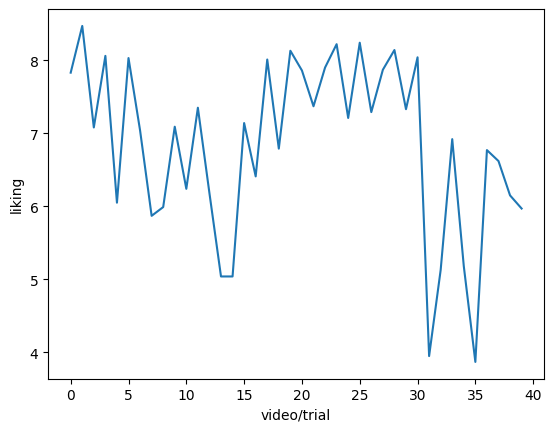

In [20]:
import matplotlib.pyplot as plt

ylabel={0:'valance', 1:'arousal', 2:'dominance', 3:'liking'}

for i in range(4):
  plt.plot(labels[:,i])
  plt.xlabel('video/trial')
  plt.ylabel(ylabel[i])
  plt.show()

In [21]:
from sklearn.model_selection import train_test_split

train_input, test_input=train_test_split(labels)

print(train_input)
print(test_input)

train_input_2=labels[:30]
test_input_2=labels[30:40]

print(train_input_2)
print(test_input_2)

[[6.96 3.92 7.19 6.05]
 [8.26 7.91 7.19 8.13]
 [2.06 8.15 8.05 5.18]
 [8.58 7.54 9.   7.08]
 [2.31 6.88 3.1  6.77]
 [1.95 3.12 2.87 6.18]
 [2.28 8.   3.27 3.95]
 [8.1  7.31 7.28 8.47]
 [2.46 6.91 6.77 6.41]
 [3.88 3.35 4.01 7.87]
 [2.08 2.99 3.22 7.33]
 [7.04 7.09 8.01 8.22]
 [2.28 7.09 7.28 6.92]
 [7.17 8.   8.1  6.79]
 [3.17 8.08 2.91 5.04]
 [7.23 7.15 6.94 8.01]
 [1.36 2.27 3.   8.14]
 [4.94 6.01 6.12 8.06]
 [8.15 3.01 7.37 7.9 ]
 [4.18 2.24 3.04 5.04]
 [7.09 2.08 7.06 7.37]
 [2.71 2.77 3.4  7.35]
 [3.24 6.18 7.87 6.15]
 [3.33 7.18 6.54 6.62]
 [7.32 2.55 6.32 5.87]
 [7.44 3.73 7.08 7.04]
 [6.81 7.44 8.15 7.14]
 [7.35 6.95 7.03 7.29]
 [8.27 3.92 7.   8.03]
 [1.99 4.86 2.04 7.09]]
[[5.1  7.12 6.17 5.97]
 [7.28 7.27 7.41 8.24]
 [2.9  6.92 6.5  3.87]
 [7.71 7.6  6.9  7.83]
 [3.81 3.85 4.78 5.13]
 [9.   7.95 8.37 7.86]
 [4.04 3.29 3.62 5.99]
 [3.03 8.14 2.86 8.04]
 [2.99 2.36 3.63 6.24]
 [8.86 7.21 8.65 7.21]]
[[7.71 7.6  6.9  7.83]
 [8.1  7.31 7.28 8.47]
 [8.58 7.54 9.   7.08]
 [4.94 6.

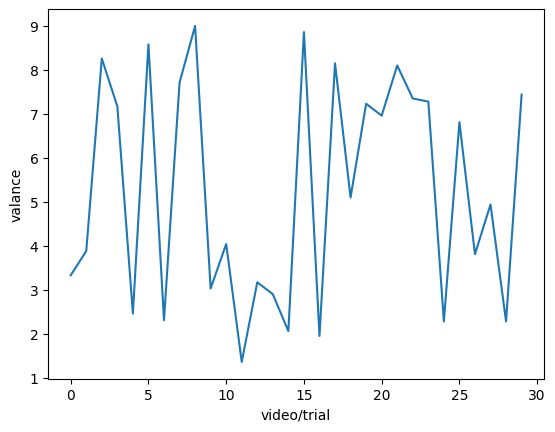

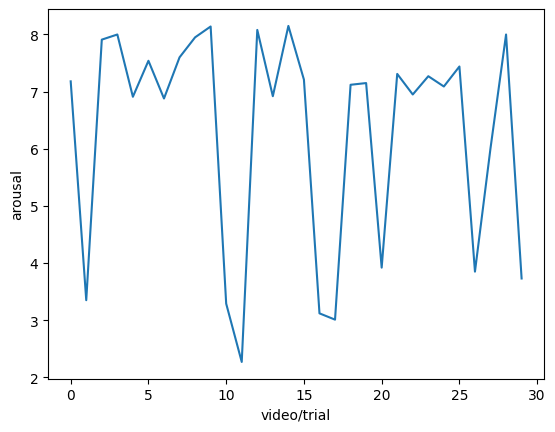

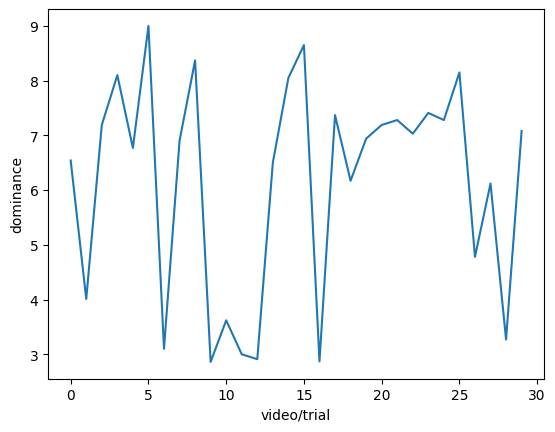

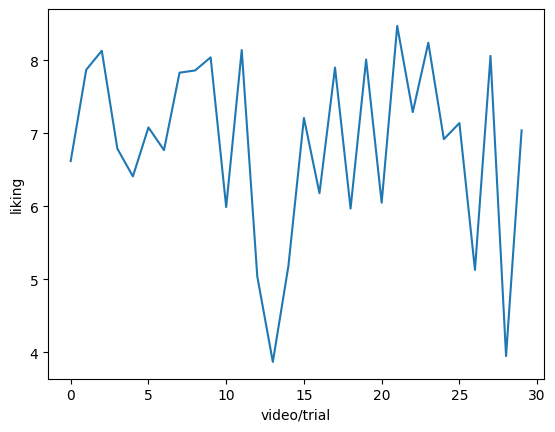

In [19]:
for i in range(4):
  plt.plot(train_input[:,i])
  plt.xlabel('video/trial')
  plt.ylabel(ylabel[i])
  plt.show()